In [29]:
!pip install -q hvplot

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [31]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.00,1,0
1,49,0,3,160,180,0,0,156,0,1.00,2,1
2,37,1,2,130,283,0,1,98,0,0.00,1,0
3,48,0,4,138,214,0,0,108,1,1.50,2,1
4,54,1,3,150,195,0,0,122,0,0.00,1,0


## Exploratory Data Analysis

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [33]:
data.shape

(1190, 12)

In [34]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,0.76,3.23,132.15,210.36,0.21,0.70,139.73,0.39,0.92,1.62,0.53
std,9.36,0.42,0.94,18.37,101.42,0.41,0.87,25.52,0.49,1.09,0.61,0.50
min,28.00,0.00,1.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,1.00,3.00,120.00,188.00,0.00,0.00,121.00,0.00,0.00,1.00,0.00
50%,54.00,1.00,4.00,130.00,229.00,0.00,0.00,140.50,0.00,0.60,2.00,1.00
75%,60.00,1.00,4.00,140.00,269.75,0.00,2.00,160.00,1.00,1.60,2.00,1.00
max,77.00,1.00,4.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,3.00,1.00


In [35]:
data.target.value_counts()

1    629
0    561
Name: target, dtype: int64

In [36]:
data.target.value_counts().hvplot.bar(
    title="Heart Disease Count",
    xlabel="Heart Disease",
    ylabel="Count",
    width=500, height=350
)

:Bars   [index]   (target)

In [37]:
data.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [38]:
categorical_val = []
continuous_val = []

for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [39]:
categorical_val

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [40]:
continuous_val

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [41]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [42]:
have_disease = data.loc[data['target']==1, 'chest pain type'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'chest pain type'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_left'
)

:Overlay
   .Bars.Chest_pain_type.I  :Bars   [index]   (chest pain type)
   .Bars.Chest_pain_type.II :Bars   [index]   (chest pain type)

In [43]:
have_disease = data.loc[data['target']==1, 'fasting blood sugar'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fasting blood sugar'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Fasting Blood Sugar", xlabel='Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fasting_blood_sugar.I  :Bars   [index]   (fasting blood sugar)
   .Bars.Fasting_blood_sugar.II :Bars   [index]   (fasting blood sugar)

In [44]:
have_disease = data.loc[data['target']==1, 'resting ecg'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'resting ecg'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Resting Electrocardiographic Results", xlabel='Resting Electrocardiographic Results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Resting_ecg.I  :Bars   [index]   (resting ecg)
   .Bars.Resting_ecg.II :Bars   [index]   (resting ecg)

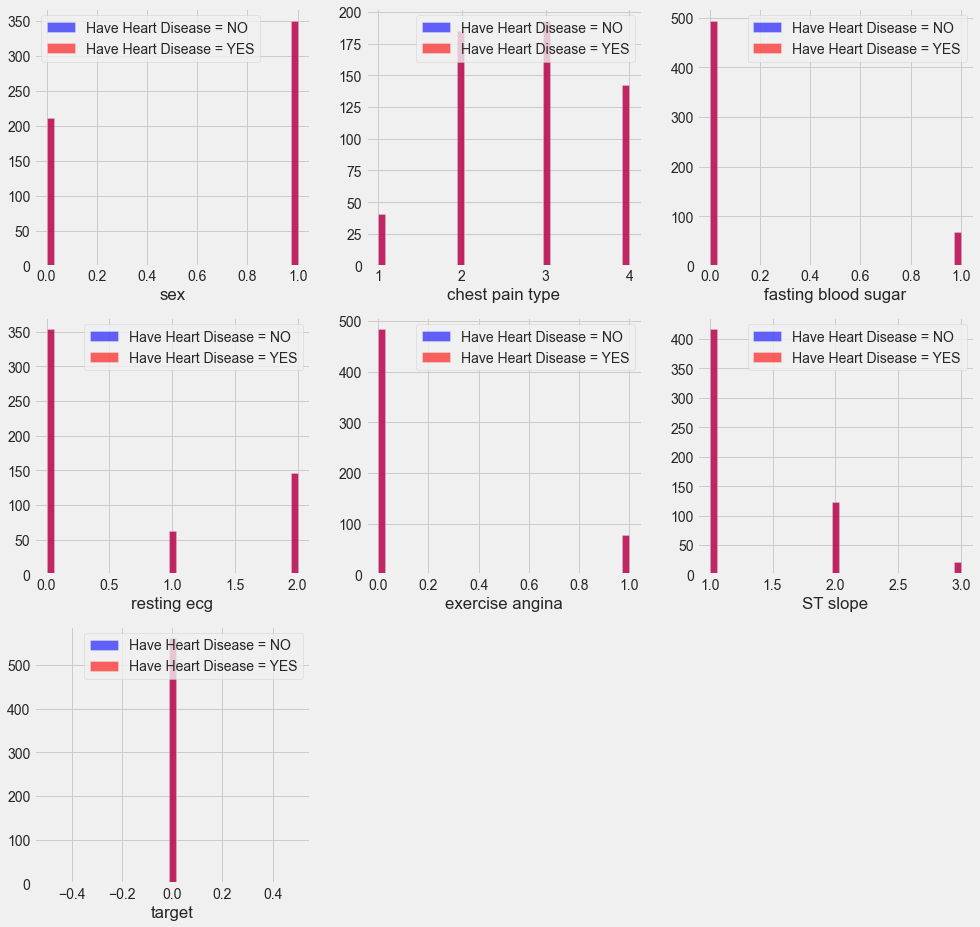

In [45]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color="blue", label="Have Heart Disease = NO", alpha = 0.6)
    data[data["target"] == 0][column].hist(bins=35, color="red", label="Have Heart Disease = YES", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

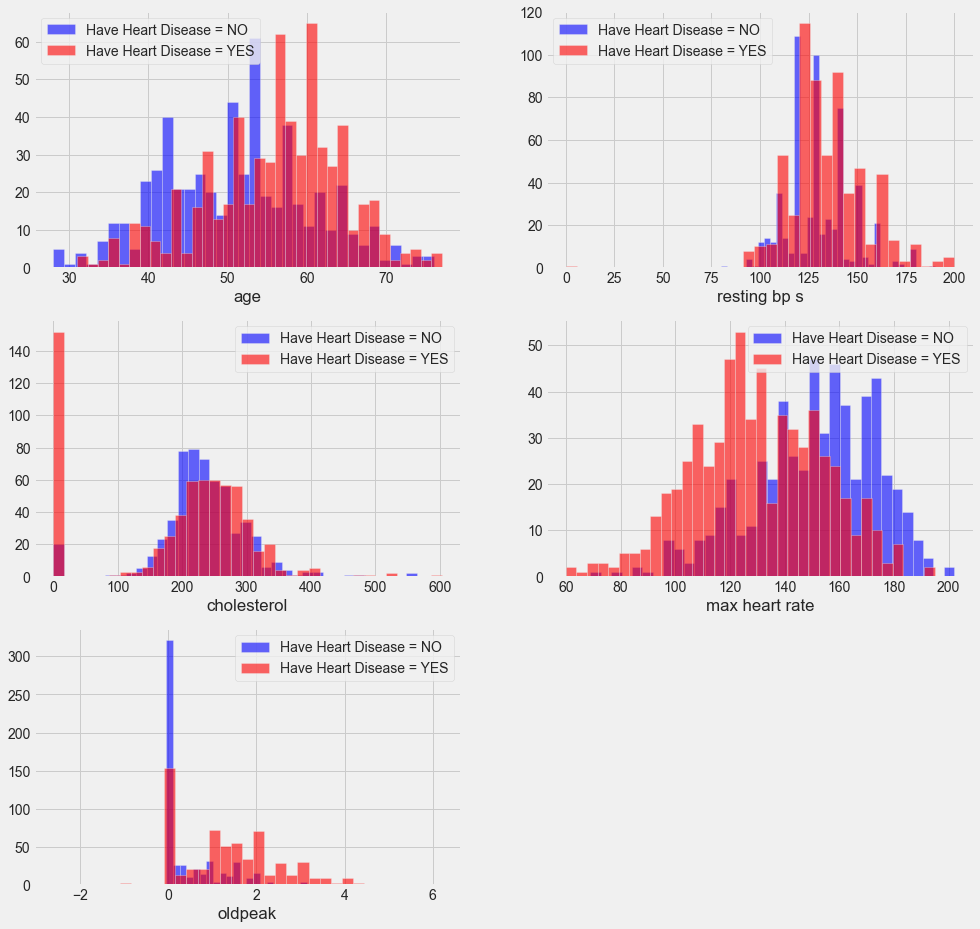

In [46]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color="blue", label="Have Heart Disease = NO", alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color="red", label="Have Heart Disease = YES", alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Age vs Maximum Heart Rate for Heart Disease

In [48]:
# Create a figure
plt.figure(figsize=(9, 7))

# Scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.max heart rate[data.target==1],
            c="green")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.max heart rate[data.target==0],
            c="blue")

# Add helpful information to the scatter plot
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No disease"]);

SyntaxError: invalid syntax (3519264459.py, line 6)